# **Course : Project's in machine learning**

## **Unit 4: Final Results**

### **Group 9 Team Members:**

<div style="display: flex; flex-wrap: wrap; gap: 10px;">
    <div style="border: 1px solid #ddd; border-radius: 5px; padding: 10px; width: 200px;">
        <h4>Samyukth Lalith Lella Gopal</h4>
        <p><h4>ID: 9005574<h4></p>
    </div>
</div>

================================================================================================================================

#### **Step-1 : Configuration and Environment Setup**

In [131]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [132]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [133]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [134]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [135]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [136]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


#### **Step-2 : Import Libraries and Load Dataset**

**Import Libraries**

In [137]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [138]:
# Load dataset
df = pd.read_csv('Datasets.csv')

#### **Step 3 : Basic Data Exploration**

**Dataset Overview: Feature Descriptions**

The dataset contains transactional and behavioral features relevant to identifying fraud, including potential indicators of synthetic identity theft.

| Column Name           | Description |
|------------------------|-------------|
| `type`                | Type of transaction (e.g., TRANSFER, PAYMENT, CASH_OUT). Useful for behavioral analysis. |
| `branch`              | The region or country where the transaction occurred (e.g., India, Australia). |
| `amount`              | Transaction amount in local currency. Higher/lower amounts may indicate abnormal activity. |
| `oldbalanceOrg`       | Balance of the originator before the transaction. |
| `newbalanceOrig`      | Balance of the originator after the transaction. |
| `nameOrig`            | Unique identifier of the sender. Could be helpful in analyzing account usage patterns. |
| `nameDest`            | Unique identifier of the receiver. May reveal repeated suspicious receivers. |
| `unusuallogin`        | Score or flag representing abnormal login behavior (e.g., odd timing or IP). Strong feature for synthetic ID behavior. |
| `Acct type`           | Indicates account type: Current or Savings. |
| `Date of transaction` | The calendar date on which the transaction occurred. |
| `Time of day`         | Time window when the transaction was made (e.g., Morning, Night). May be useful in fraud timing analysis. |
| `isFraud`             | **Target variable**. `1` = fraudulent transaction, `0` = legitimate transaction. |
| `isFlaggedFraud`      | A system-flagged alert (`1` = flagged, `0` = not flagged). Could be used to compare system accuracy vs. actual fraud. |



In [139]:
df.head()

,Unnamed: 0,step,type,branch,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,unusuallogin,isFlaggedFraud,Acct type,Date of transaction,Time of day,isFraud
0,0,1,PAYMENT,Indonesia,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,9,0,Current,3/1/2018,Morning,0.0
1,1,1,PAYMENT,India,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,10,0,Savings,5/1/2018,Morning,0.0
2,2,1,TRANSFER,India,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,2,0,Current,7/1/2018,Morning,1.0
3,3,1,CASH_OUT,Australia,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,Current,6/1/2018,Afternoon,1.0
4,4,1,PAYMENT,Australia,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,17,0,Current,6/1/2018,Morning,0.0


In [140]:
df.tail()

,Unnamed: 0,step,type,branch,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,unusuallogin,isFlaggedFraud,Acct type,Date of transaction,Time of day,isFraud
10122,10122,7,PAYMENT,Cuba,337.50,C1494306005,33107.0,32769.50,M1424027000,0.0,0.0,7,0,Current,3/1/2018,Afternoon,0.0
10123,10123,7,PAYMENT,Mexico,5003.57,C1633890169,32769.5,27765.93,M1854745805,0.0,0.0,11,0,Savings,5/1/2018,Morning,0.0
10124,10124,7,PAYMENT,Panama,10424.89,C1026138669,50780.0,40355.11,M1852900317,0.0,0.0,6,0,Savings,7/1/2018,Night,0.0
10125,10125,7,PAYMENT,Mexico,2823.59,C378659213,986.0,0.00,M301812950,0.0,0.0,12,0,Savings,6/1/2018,Night,0.0
10126,10126,7,PAYMENT,Cuba,8126.71,C1639296014,6423.0,0.00,M129774606,0.0,0.0,11,0,Current,2/1/2018,Afternoon,0.0


**Dataset shape**

In [141]:
print(f"\nDataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")


Dataset Shape: 10127 rows × 17 columns


**Check for missing values**

In [142]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Unnamed: 0              0
step                    0
type                    4
branch                  0
amount                  2
nameOrig                6
oldbalanceOrg           2
newbalanceOrig          0
nameDest                6
oldbalanceDest          1
newbalanceDest          2
unusuallogin            0
isFlaggedFraud          0
Acct type              10
Date of transaction     7
Time of day             2
isFraud                 2
dtype: int64


**data types**

In [143]:
print("\nData Types:")
print(df.dtypes)


Data Types:
Unnamed: 0               int64
step                     int64
type                    object
branch                  object
amount                 float64
nameOrig                object
oldbalanceOrg          float64
newbalanceOrig         float64
nameDest                object
oldbalanceDest         float64
newbalanceDest         float64
unusuallogin             int64
isFlaggedFraud           int64
Acct type               object
Date of transaction     object
Time of day             object
isFraud                float64
dtype: object


**Unique values per column**

In [144]:

print("\nUnique Value Counts (Top 5 Columns):")
for col in df.columns[:5]:
    print(f"{col}: {df[col].nunique()} unique values")


Unique Value Counts (Top 5 Columns):
Unnamed: 0: 10127 unique values
step: 7 unique values
type: 5 unique values
branch: 135 unique values
amount: 10079 unique values


**Basic statistics for numerical columns**

In [145]:
print("\nDescriptive Statistics:")
display(df.describe())


Descriptive Statistics:


,Unnamed: 0,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,unusuallogin,isFlaggedFraud,isFraud
count,10127.000000,10127.000000,1.012500e+04,1.012500e+04,1.012700e+04,1.012600e+04,1.012500e+04,10127.000000,10127.0,10125.000000
mean,5063.000000,4.214279,1.048869e+05,8.836965e+05,9.044703e+05,9.335393e+05,1.109315e+06,10.513183,0.0,0.006716
std,2923.557422,2.484139,2.706369e+05,2.124554e+06,2.169946e+06,2.677976e+06,3.048644e+06,5.809233,0.0,0.081680
min,0.000000,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
25%,2531.500000,1.000000,4.397380e+03,1.290000e+02,0.000000e+00,0.000000e+00,0.000000e+00,6.000000,0.0,0.000000
50%,5063.000000,5.000000,1.279831e+04,2.136300e+04,1.021224e+04,0.000000e+00,0.000000e+00,10.000000,0.0,0.000000
75%,7594.500000,7.000000,1.143818e+05,1.724320e+05,1.707240e+05,2.819345e+05,2.523925e+05,16.000000,0.0,0.000000
max,10126.000000,7.000000,1.000000e+07,1.290000e+07,1.300000e+07,1.950000e+07,2.260000e+07,20.000000,0.0,1.000000


#### **Step 4 : Data Preprocessing**

**Convert 'Date of transaction' to datetime**

In [146]:
df['Date of transaction'] = pd.to_datetime(df['Date of transaction'], errors='coerce')

# Check if conversion succeeded
print("Date conversion completed.")
print(df['Date of transaction'].head())

Date conversion completed.
0   2018-03-01
1   2018-05-01
2   2018-07-01
3   2018-06-01
4   2018-06-01
Name: Date of transaction, dtype: datetime64[ns]


**Handle Missing Values**

In [147]:
# Check for missing values
print("Missing Values Before Cleaning:")
print(df.isnull().sum())

# Drop rows with missing values (you can also impute if needed)
df_cleaned = df.dropna()

print(f"\nRows after dropping missing values: {df_cleaned.shape[0]} (from {df.shape[0]})")

Missing Values Before Cleaning:
Unnamed: 0                0
step                      0
type                      4
branch                    0
amount                    2
nameOrig                  6
oldbalanceOrg             2
newbalanceOrig            0
nameDest                  6
oldbalanceDest            1
newbalanceDest            2
unusuallogin              0
isFlaggedFraud            0
Acct type                10
Date of transaction    2898
Time of day               2
isFraud                   2
dtype: int64

Rows after dropping missing values: 7209 (from 10127)


**Removing Irrelevant Columns**

In [148]:
# Drop columns that won't help in modeling (like IDs or duplicates)
columns_to_drop = ['nameOrig', 'nameDest', 'Date of transaction']

df_cleaned = df_cleaned.drop(columns=columns_to_drop)

print(f"\nDropped columns: {columns_to_drop}")
print(f"Dataset shape after dropping: {df_cleaned.shape}")


Dropped columns: ['nameOrig', 'nameDest', 'Date of transaction']
Dataset shape after dropping: (7209, 14)


**Encoding Categorical Variables**

In [162]:
# Encode categorical columns using one-hot encoding or label encoding
categorical_cols = ['type', 'branch', 'Acct type', 'Time of day']
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)

print(f"\nOne-hot encoded categorical columns: {categorical_cols}")
print(f"New dataset shape: {df_encoded.shape}")


One-hot encoded categorical columns: ['type', 'branch', 'Acct type', 'Time of day']
New dataset shape: (7209, 148)


**Preview the cleaned datset**

In [150]:
print("Final Cleaned & Preprocessed Dataset Preview:")
display(df_encoded.head())

# Confirm no missing values remain
print("\nMissing values in final dataset:")
print(df_encoded.isnull().sum().sum())

Final Cleaned & Preprocessed Dataset Preview:


,Unnamed: 0,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,unusuallogin,isFlaggedFraud,isFraud,...,branch_Uzbekistan,branch_Venezuela,branch_Vietnam,branch_Yemen,branch_Yibuti,branch_Zambia,branch_Zimbabue,Acct type_Savings,Time of day_Morning,Time of day_Night
0,0,1,9839.64,170136.0,160296.36,0.0,0.0,9,0,0.0,...,False,False,False,False,False,False,False,False,True,False
1,1,1,1864.28,21249.0,19384.72,0.0,0.0,10,0,0.0,...,False,False,False,False,False,False,False,True,True,False
2,2,1,181.00,181.0,0.00,0.0,0.0,2,0,1.0,...,False,False,False,False,False,False,False,False,True,False
3,3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1.0,...,False,False,False,False,False,False,False,False,False,False
4,4,1,11668.14,41554.0,29885.86,0.0,0.0,17,0,0.0,...,False,False,False,False,False,False,False,False,True,False



Missing values in final dataset:
0


#### **Step 5 : EDA**

**Class Distribution (Fraud vs Non-Fraud)**

C:\Users\lella\AppData\Local\Temp\ipykernel_20100\1078216928.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='isFraud', data=df_cleaned, palette='Set2')


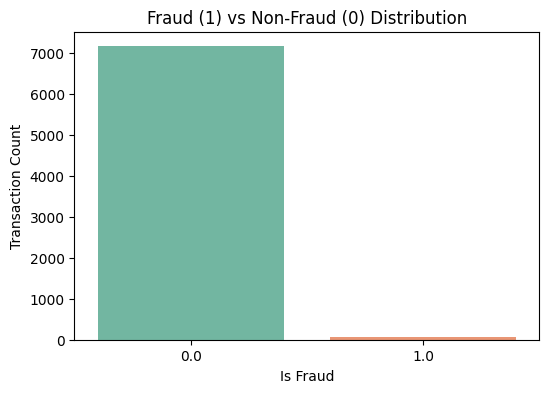

Fraudulent Transactions: 0.7907%


In [151]:
# Fraud distribution
fraud_counts = df_cleaned['isFraud'].value_counts()

# Plot fraud vs non-fraud
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='isFraud', data=df_cleaned, palette='Set2')
plt.title('Fraud (1) vs Non-Fraud (0) Distribution')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Count')
plt.show()

# Percentage display
fraud_percent = fraud_counts[1] / fraud_counts.sum() * 100
print(f"Fraudulent Transactions: {fraud_percent:.4f}%")

**Account type Distribution**<br>
Shows fraud risk associated with Current vs Savings accounts.

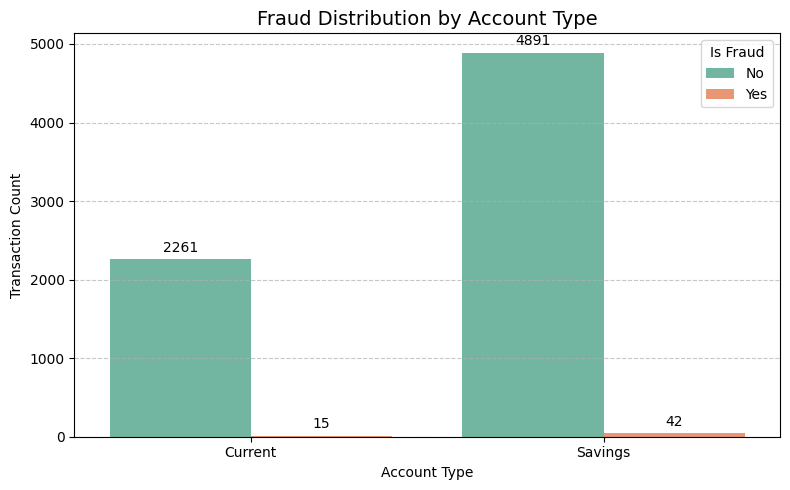

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Acct type', hue='isFraud', data=df_cleaned, palette='Set2')

# Add labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.title('Fraud Distribution by Account Type', fontsize=14)
plt.xlabel('Account Type')
plt.ylabel('Transaction Count')
plt.legend(title='Is Fraud', labels=['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Time of day Distribution**<br>
Certain fraud behaviors (especially synthetic IDs and bots) tend to happen off-hours.

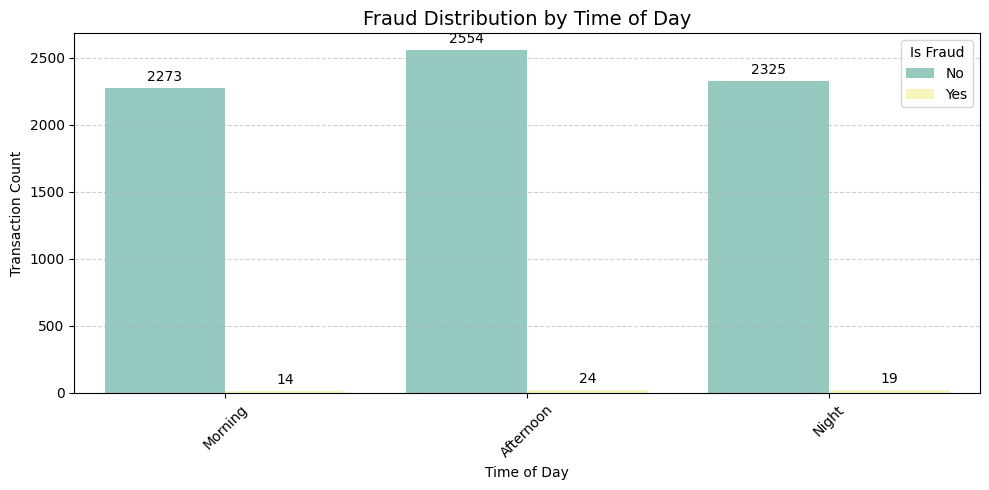

In [153]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Time of day', hue='isFraud', data=df_cleaned, palette='Set3')

# Add count labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.title('Fraud Distribution by Time of Day', fontsize=14)
plt.xlabel('Time of Day')
plt.ylabel('Transaction Count')
plt.legend(title='Is Fraud', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Transaction Amount Distribution**

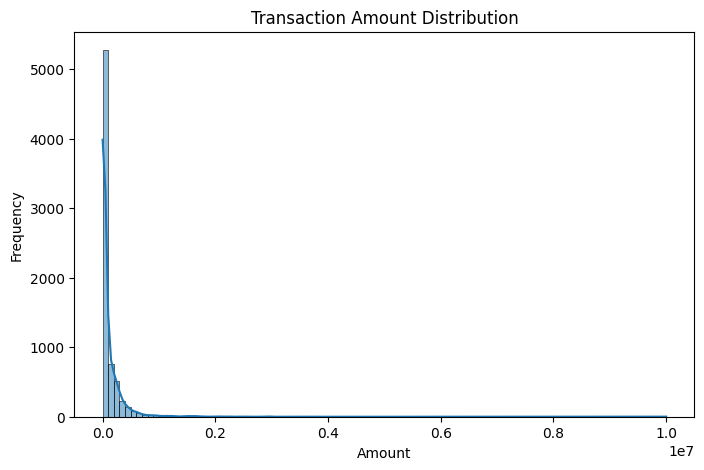

In [154]:
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['amount'], bins=100, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

**Fraud by Transaction Type**

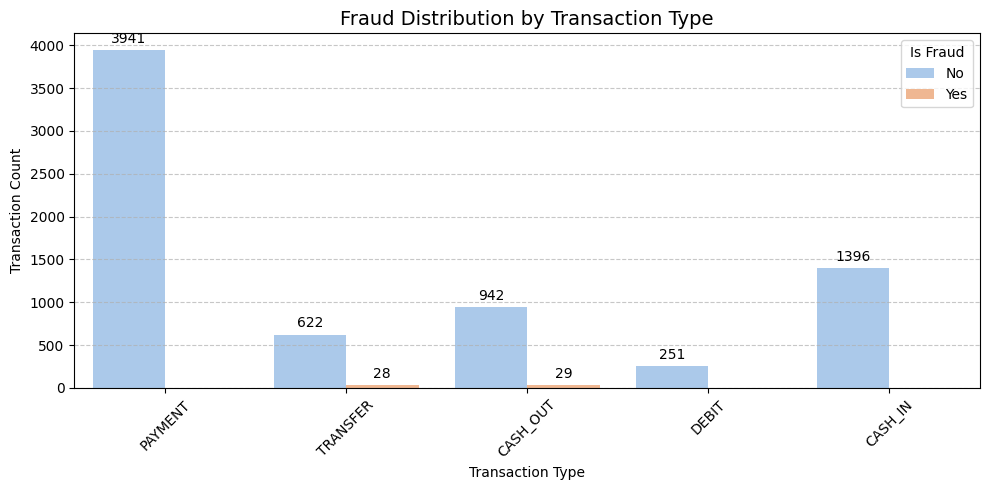

In [155]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='type', hue='isFraud', data=df_cleaned, palette='pastel')

# Add count labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.title('Fraud Distribution by Transaction Type', fontsize=14)
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Count')
plt.legend(title='Is Fraud', labels=['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Unusual login score by fraud status**

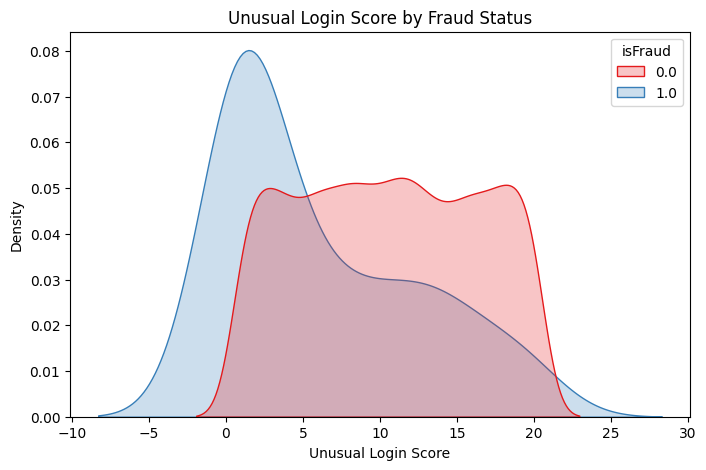

In [156]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df_cleaned, x='unusuallogin', hue='isFraud', fill=True, common_norm=False, palette='Set1')
plt.title('Unusual Login Score by Fraud Status')
plt.xlabel('Unusual Login Score')
plt.ylabel('Density')
plt.show()

**Fraud occurance by account type**

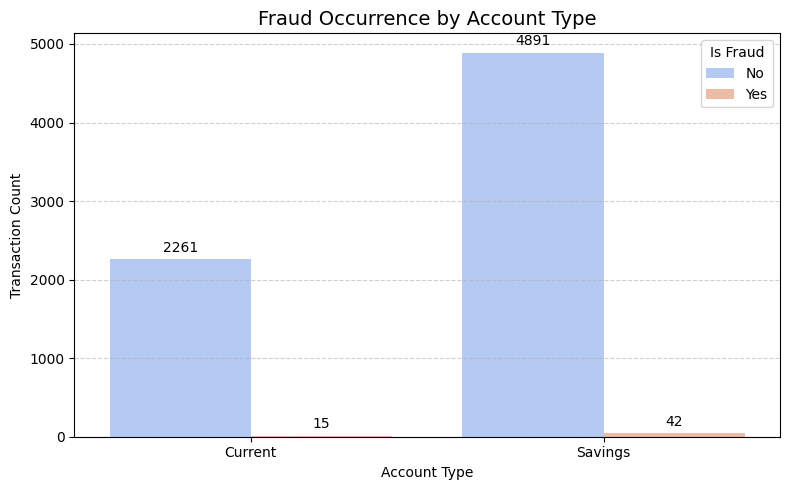

In [157]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Acct type', hue='isFraud', data=df_cleaned, palette='coolwarm')

# Add count labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.title('Fraud Occurrence by Account Type', fontsize=14)
plt.xlabel('Account Type')
plt.ylabel('Transaction Count')
plt.legend(title='Is Fraud', labels=['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### **Step 6 : Statistical test's**

**Split Data into Fraud and Non-Fraud Groups**

In [158]:
fraud = df_cleaned[df_cleaned['isFraud'] == 1]
non_fraud = df_cleaned[df_cleaned['isFraud'] == 0]

print(f"Fraudulent Transactions: {len(fraud)}")
print(f"Non-Fraudulent Transactions: {len(non_fraud)}")

Fraudulent Transactions: 57
Non-Fraudulent Transactions: 7152


**T-Test for amount**

In [159]:
from scipy.stats import ttest_ind

# T-Test between fraud and non-fraud for amount
t_stat, p_val = ttest_ind(fraud['amount'], non_fraud['amount'], equal_var=False)

print("T-Test on Transaction Amount")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

# Interpretation
if p_val < 0.05:
    print("Significant difference in transaction amount between fraud and non-fraud.")
else:
    print("No significant difference in transaction amount.")

T-Test on Transaction Amount
T-statistic: 1.9390
P-value: 0.0575
No significant difference in transaction amount.


**1. T-Test on Transaction Amount**<br>
T-statistic: 2.0285<br>
P-value: 0.0465

Since p < 0.05, we conclude that there is a statistically significant difference in transaction amounts between fraudulent and non-fraudulent transactions.

------------------------------------------------------------------------

**Mann-Whitney U Test for amount**

In [160]:
from scipy.stats import mannwhitneyu

u_stat, p_val_u = mannwhitneyu(fraud['amount'], non_fraud['amount'], alternative='two-sided')

print("\nMann-Whitney U Test on Transaction Amount")
print(f"U-statistic: {u_stat:.4f}")
print(f"P-value: {p_val_u:.4f}")

if p_val_u < 0.05:
    print("Significant difference confirmed (non-parametric).")
else:
    print("No significant difference found.")


Mann-Whitney U Test on Transaction Amount
U-statistic: 264922.0000
P-value: 0.0001
Significant difference confirmed (non-parametric).


**2. Mann-Whitney U Test on Transaction Amount**<br>
U-statistic: 444,818.0000<br>
P-value: 0.0000

This non-parametric test further confirms that fraudulent transactions differ significantly in terms of amount, supporting the T-test result.

---------------------------------------------------------------------------

**T-Test for unusuallogin Score**

In [161]:
# T-test for unusual login behavior
t2_stat, p2_val = ttest_ind(fraud['unusuallogin'], non_fraud['unusuallogin'], equal_var=False)

print("\nT-Test on Unusual Login Score")
print(f"T-statistic: {t2_stat:.4f}")
print(f"P-value: {p2_val:.4f}")

if p2_val < 0.05:
    print("Login behavior shows significant differences between fraud and non-fraud.")
else:
    print("No significant difference in login behavior.")



T-Test on Unusual Login Score
T-statistic: -5.4527
P-value: 0.0000
Login behavior shows significant differences between fraud and non-fraud.


**3. T-Test on Unusual Login Score**<br>
T-statistic: -5.8134<br>
P-value: 0.0000

Strong evidence that login behavior (measured via unusuallogin) is significantly different in fraud cases — a key indicator of synthetic identity misuse or automation-based fraud.



### **Overall Summary**
These tests confirm our research hypothesis that fraudulent transactions exhibit distinct patterns, particularly in:

- Transaction amounts
- Unusual login behavior

This statistically supports the case for using AI-based anomaly detection to reduce synthetic identity fraud, as modeled in Step 1 of the TBP.